# Covariance and correlation

**THIS CHAPTER IS CURRENTLY UNDER CONSTRUCTION!!!**



## Dependence of random variables

If two random variables $X$ and $Y$ are _not_ [independent](independence), then (naturally) they are called _dependent_. Though our goal in this chapter is to study a _particular type_ of dependence between random variables, I think it will benefit us by first discussing dependence in general.

A natural source of examples of dependent random variables are those which are *functionally* dependent in the sense of the following theorem:

```{prf:theorem} Functional dependence $\Rightarrow$ dependence

Let $X$ and $Y$ be random variables. If $Y = h(X)$ for some function $h:\mathbb{R} \to \mathbb{R}$, then $X$ and $Y$ are dependent.
```

In order to prove this, we need to make the (mild) assumption that there is an event $B\subset \mathbb{R}$ with

$$
0<P(Y\in B)<1.
$$ (middle-eqn)

In this case, we set $A = f^{-1}(B)^c$ and observe that

$$
P(X\in A, \ Y\in B) = P(\emptyset) =0.
$$

On the other hand, we have

$$
P(X\in A) = 1 - P(Y\in B),
$$

and so

$$
P(X\in A) P(Y\in B) = (1 - P(Y\in B))P(Y\in B) \neq 0
$$

by {eq}`middle-eqn`. But then

$$
P(X\in A, \ Y\in B) \neq P(X\in A) P(Y\in B),
$$

which proves $X$ and $Y$ are dependent.

What does a pair of functionally dependent random variables look like? For an example, let's suppose that

$$
X \sim \mathcal{N}(1,0.5^2) \quad \text{and} \quad Y = h(X) = X(X-1)(X-2).
$$

Then, let's simulate a draw of 1000 samples from $X$, toss them into

$$
h(x) = x(x-1)(x-2)
$$

to obtain the associated $y$-values, and then produce a scatter plot:

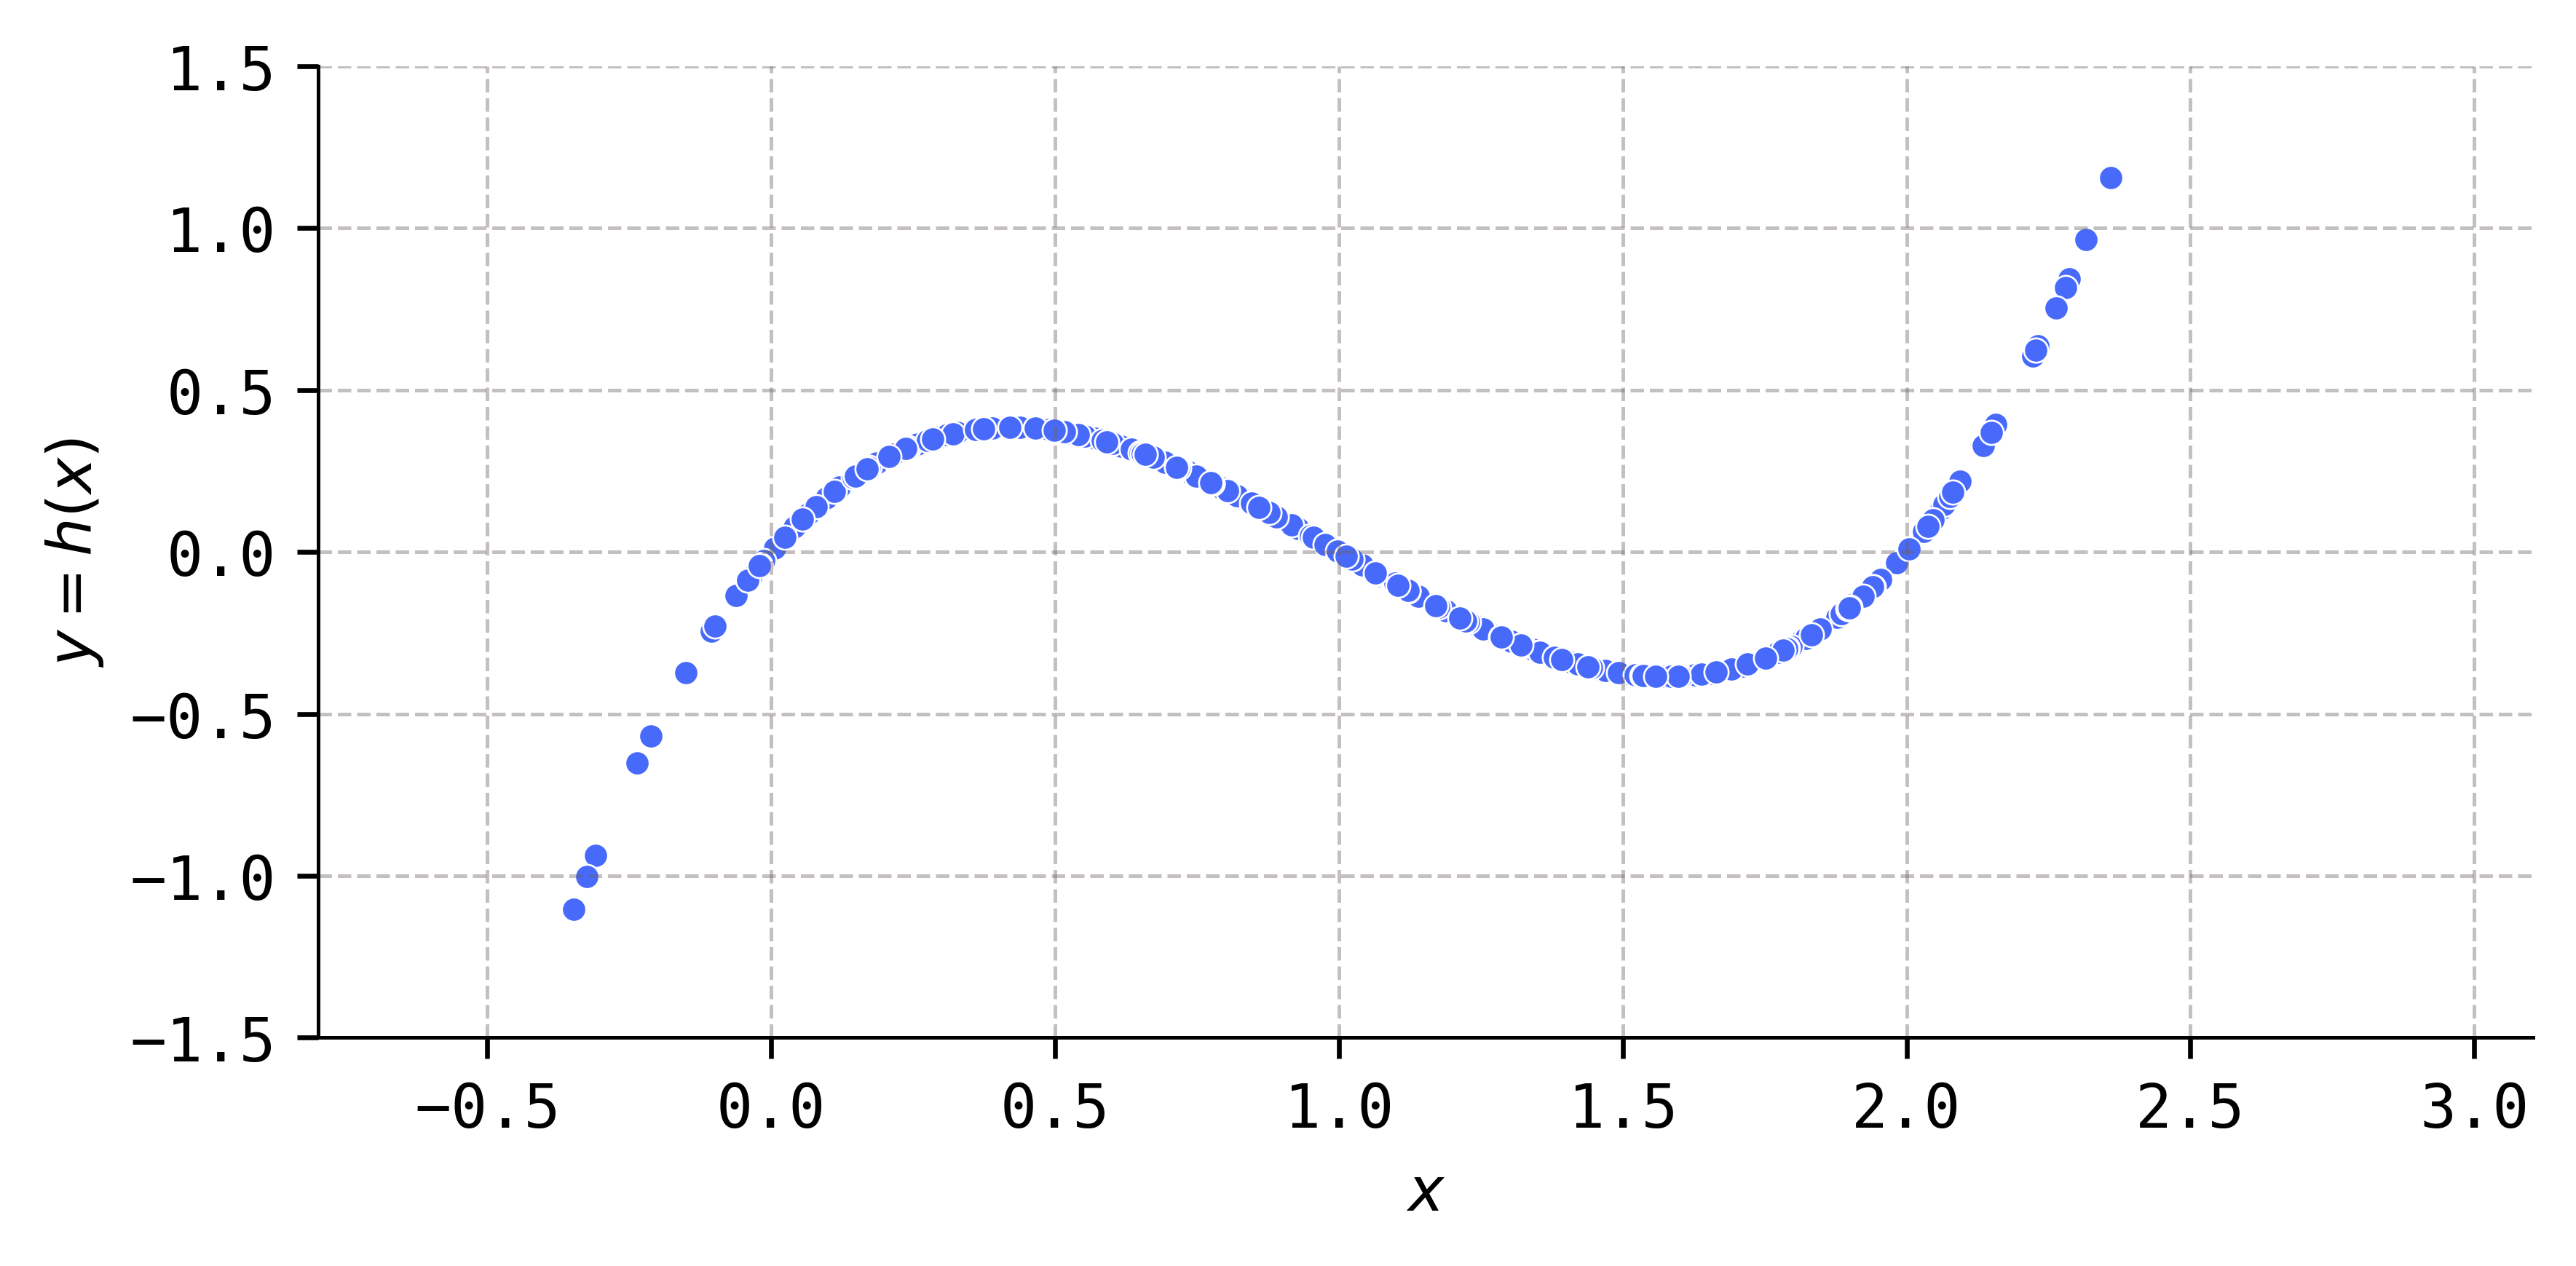

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import scipy as sp
import pandas as pd
import warnings
plt.style.use('../aux-files/custom_style_light.mplstyle')
mpl.rcParams['figure.dpi'] = 600
warnings.filterwarnings("ignore")

np.random.seed(42)

def h(x):
    return x * (x - 1) * (x - 2)

x = sp.stats.norm.rvs(loc=1, scale=0.5, size=1000)
y = h(x)

sns.scatterplot(x=x, y=y)
plt.xlabel('$x$')
plt.ylabel('$y=h(x)$')
plt.ylim(-1.5, 1.5)
plt.gcf().set_size_inches(w=6, h=3)
plt.tight_layout()

The plot looks exactly like we would expect: A bunch of points lying on the graph of the function $y=h(x)$.

However, very often with real-world data, an **exact** functional dependence $Y = h(X)$ does not truly hold. Instead, the functional relationship is "noisy", resulting in scatter plots that look like this:

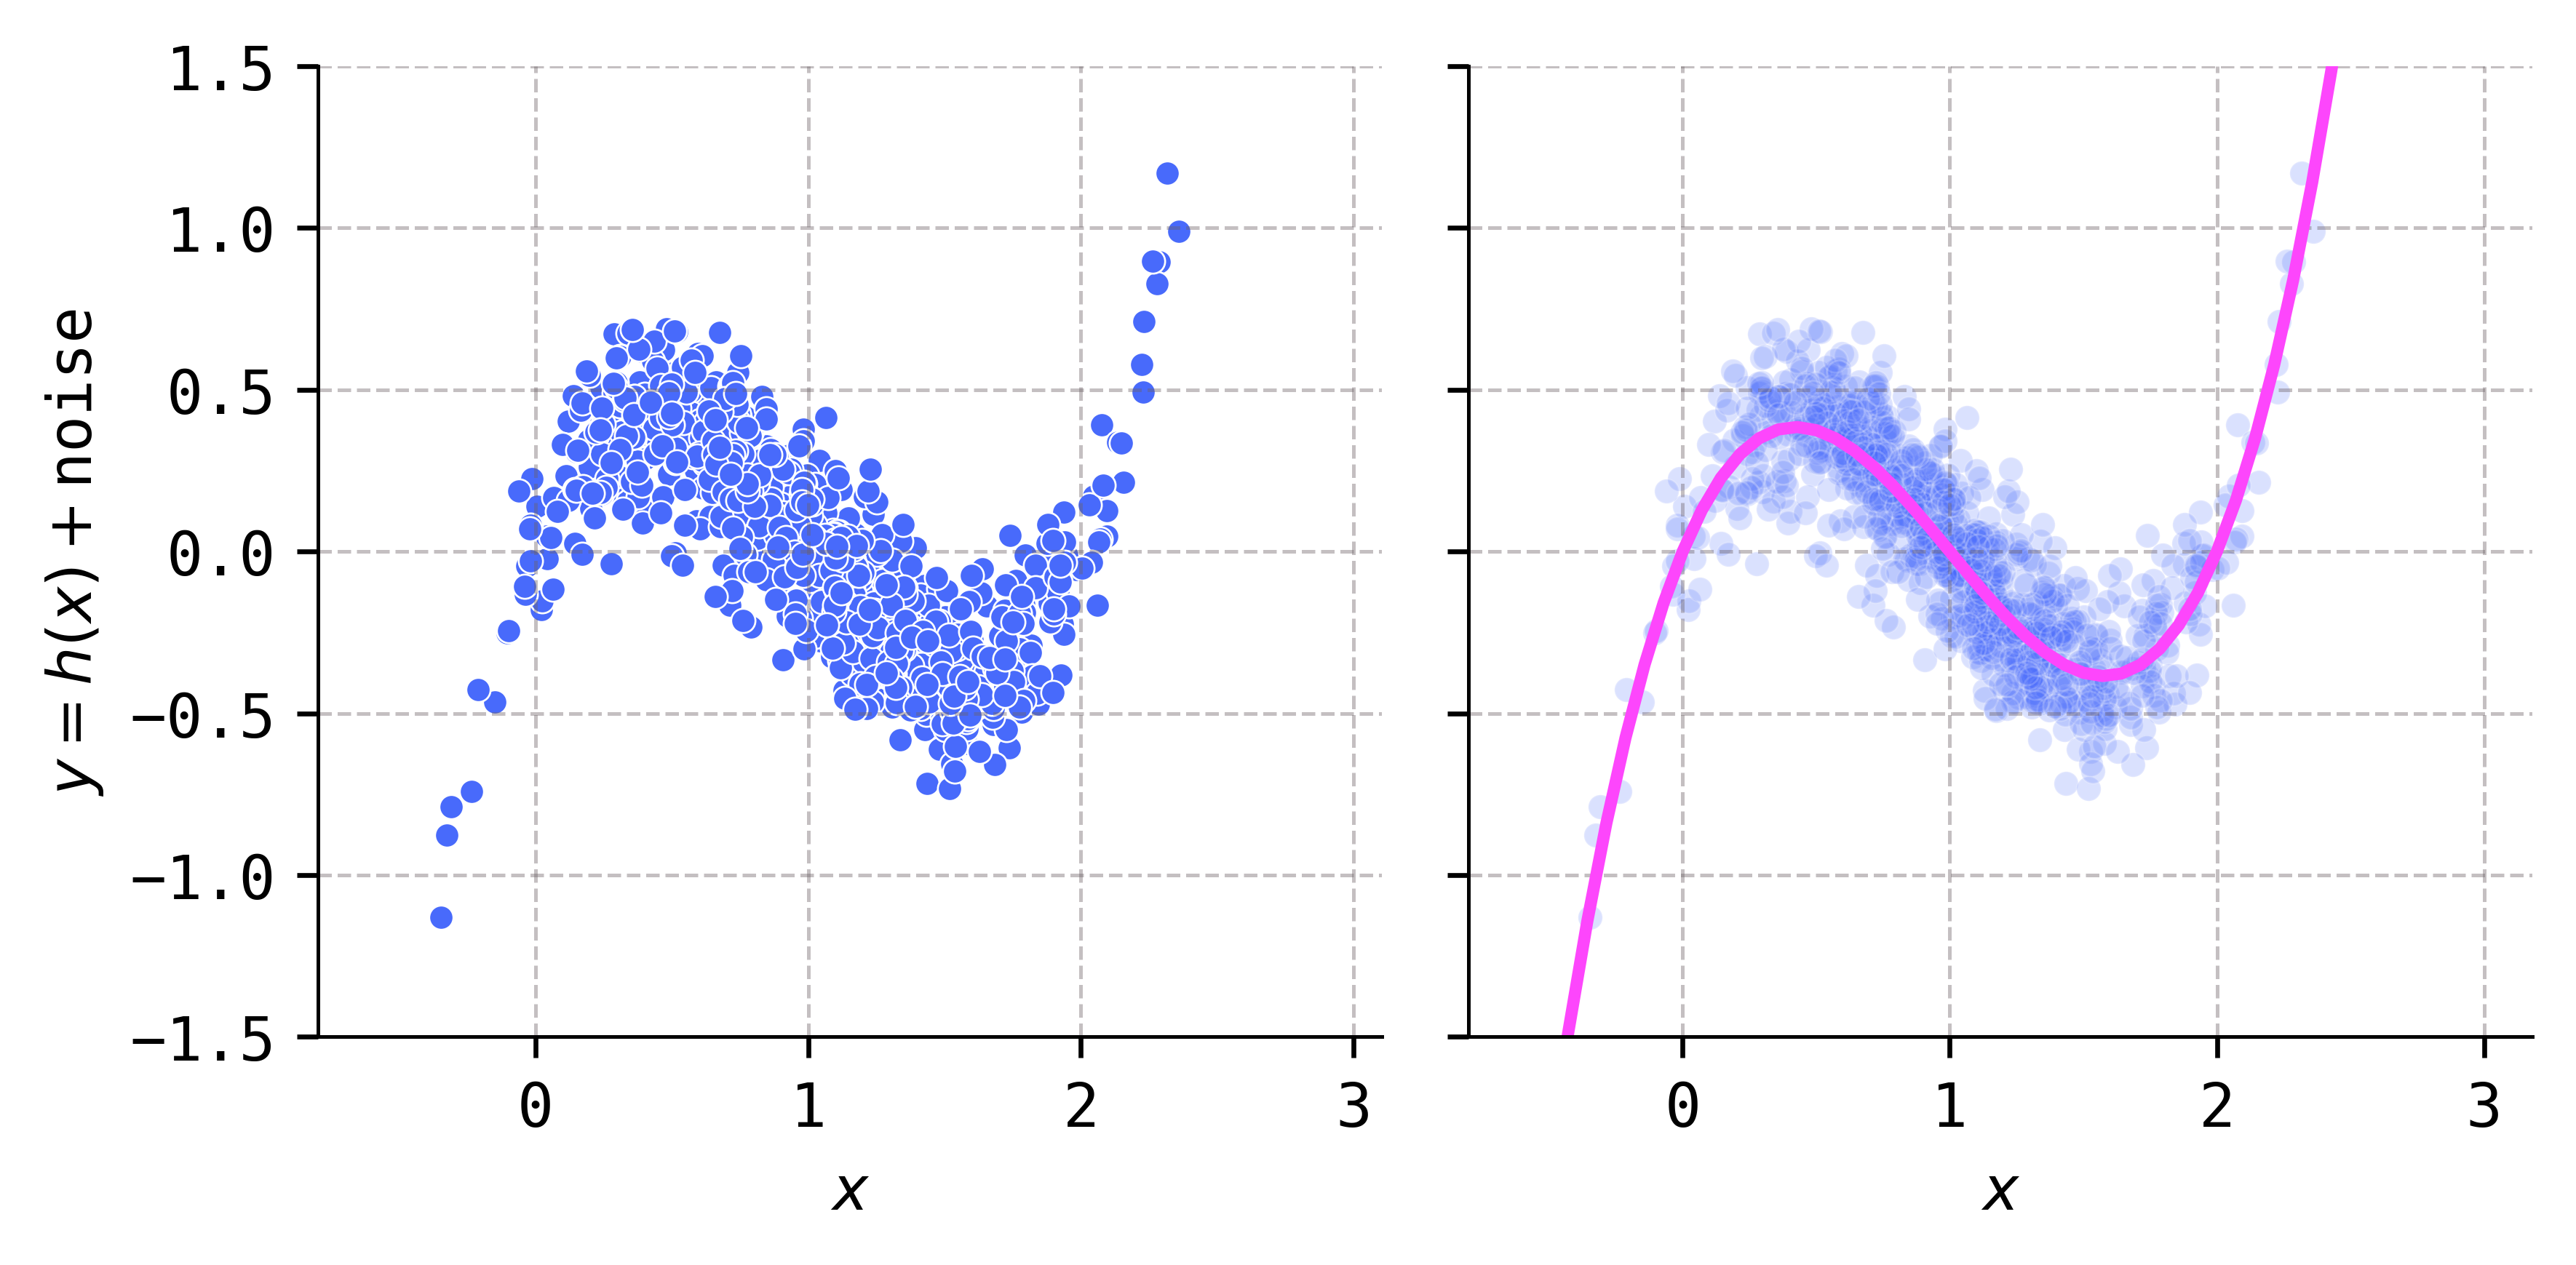

In [2]:
epsilon = sp.stats.norm.rvs(scale=0.15, size=1000)
grid = np.linspace(-0.5, 3)

_, ax = plt.subplots(ncols=2, figsize=(6, 3), sharey=True)

sns.scatterplot(x=x, y=y + epsilon, ax=ax[0])
ax[0].set_ylim(-1.5, 1.5)
ax[0].set_xlabel('$x$')
ax[0].set_ylabel('$y=h(x) + $noise')

sns.scatterplot(x=x, y=y + epsilon, alpha=0.2, ax=ax[1])
ax[1].plot(grid, h(grid), color='#FD46FC')
ax[1].set_xlabel('$x$')

plt.tight_layout()

The "noisy" functional relationship is drawn in the left-hand plot, while on the right-hand plot I have superimposed the graph of the function $y=h(x)$ for reference. Instead of lying directly on the graph of $y=h(x)$, the data is clustered along the graph.

The goal in this chapter is to study "noisy" _linear_ dependencies between random variables; relationships that look like these:

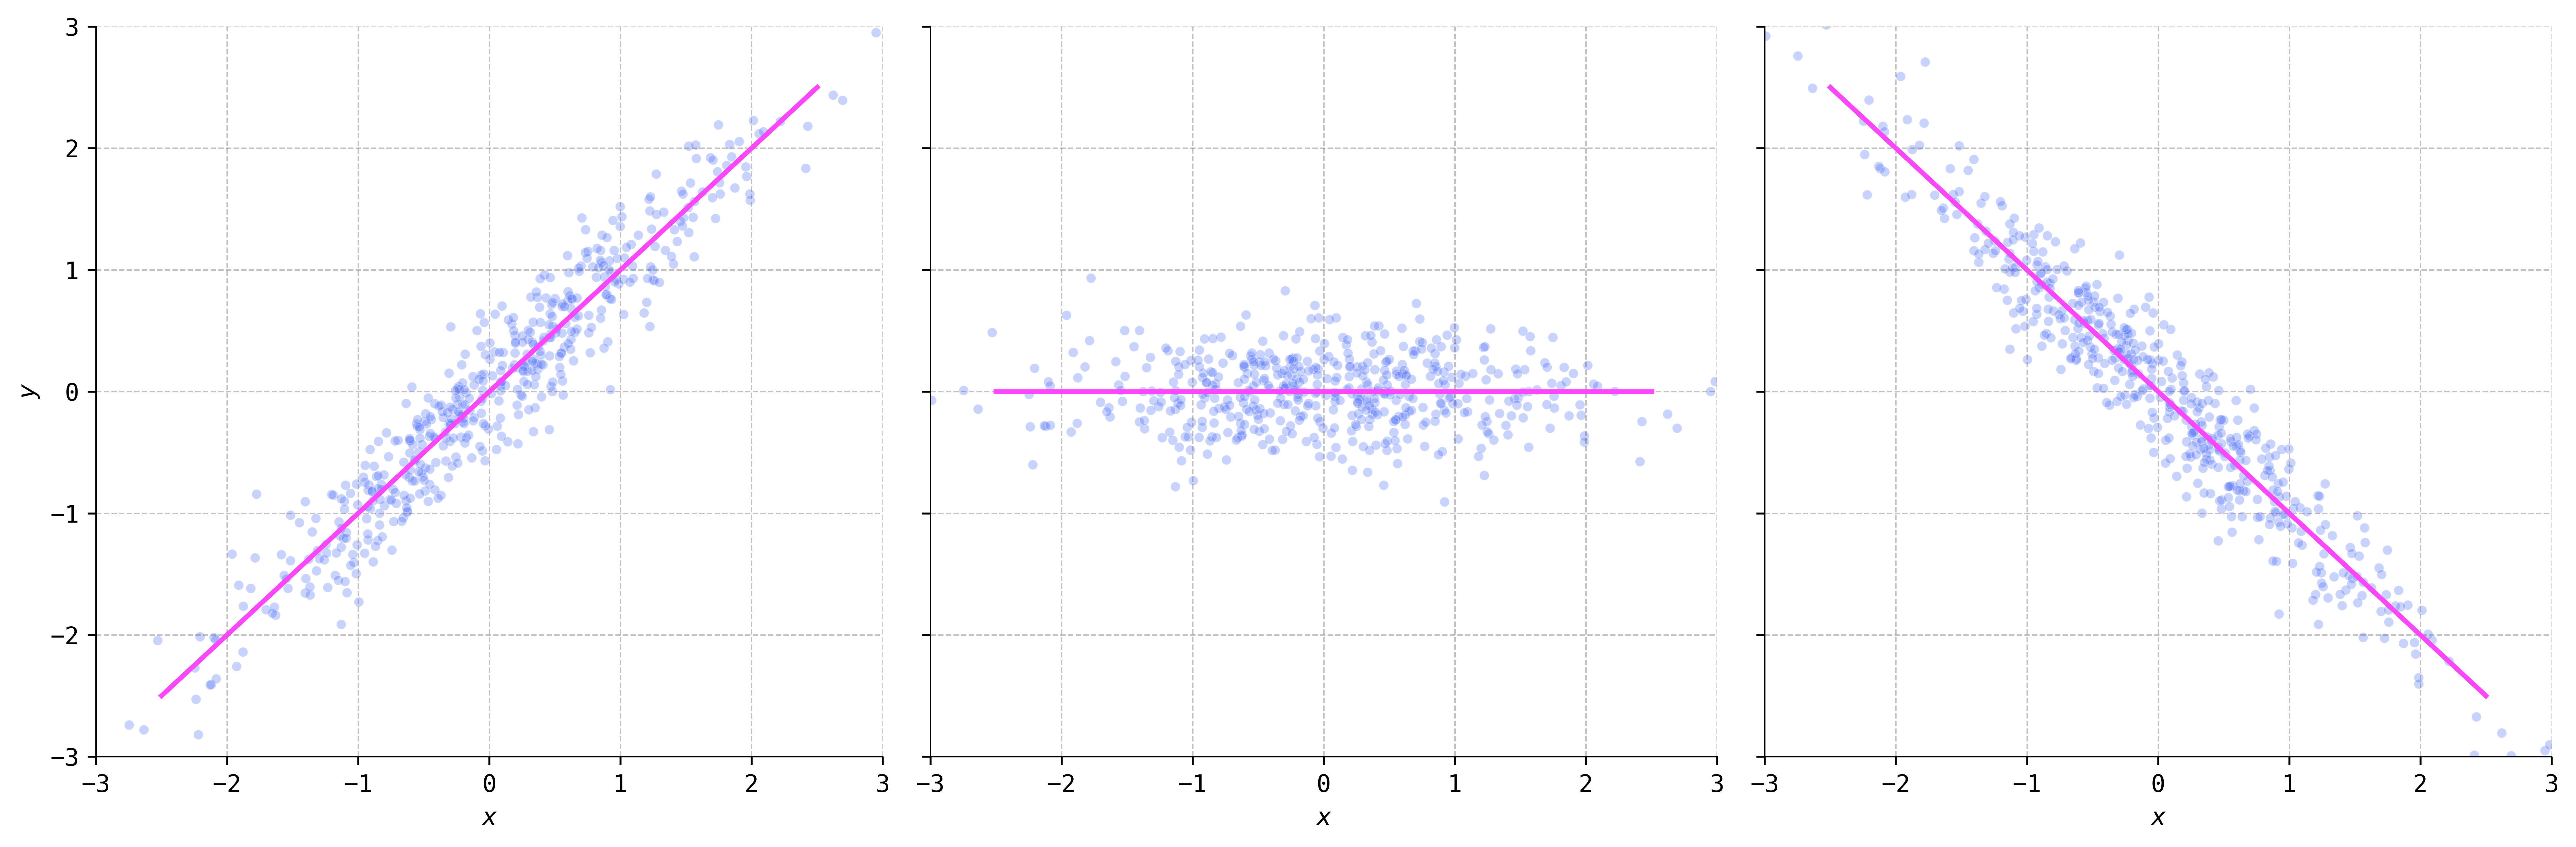

In [3]:
grid = np.linspace(-2.5, 2.5)
epsilon = sp.stats.norm.rvs(scale=0.3, size=500)
m = [1, 0, -1]
x = sp.stats.norm.rvs(size=500)
_, ax = plt.subplots(ncols=3, figsize=(15, 5), sharey=True, sharex=True)

for i, m in enumerate(m):
    y = m * x + epsilon
    sns.scatterplot(x=x, y=y, ax=ax[i], alpha=0.3)
    ax[i].plot(grid, m * grid, color='#FD46FC')
    ax[i].set_xlim(-3, 3)
    ax[i].set_ylim(-3, 3)
    ax[i].set_xlabel('$x$')
    ax[i].set_ylabel('$y$')

plt.tight_layout()

We have already seen scatter plots like this before! Indeed, recall Ames housing dataset from the [third programming assignment](https://github.com/jmyers7/stats-book-materials/tree/main/programming-assignments) and the [beginning](motivation) of the previous chapter consisting of pairs

$$
(x_1,y_1),(x_2,y_2),\ldots,(x_{2{,}930},y_{2{,}930}),
$$

where $x_i$ is the area of the $i$-th house (in ft$^2$) and $y_i$ is the selling price (in $1k). This was the scatter plot of the data, with a straight line superimposed for reference:

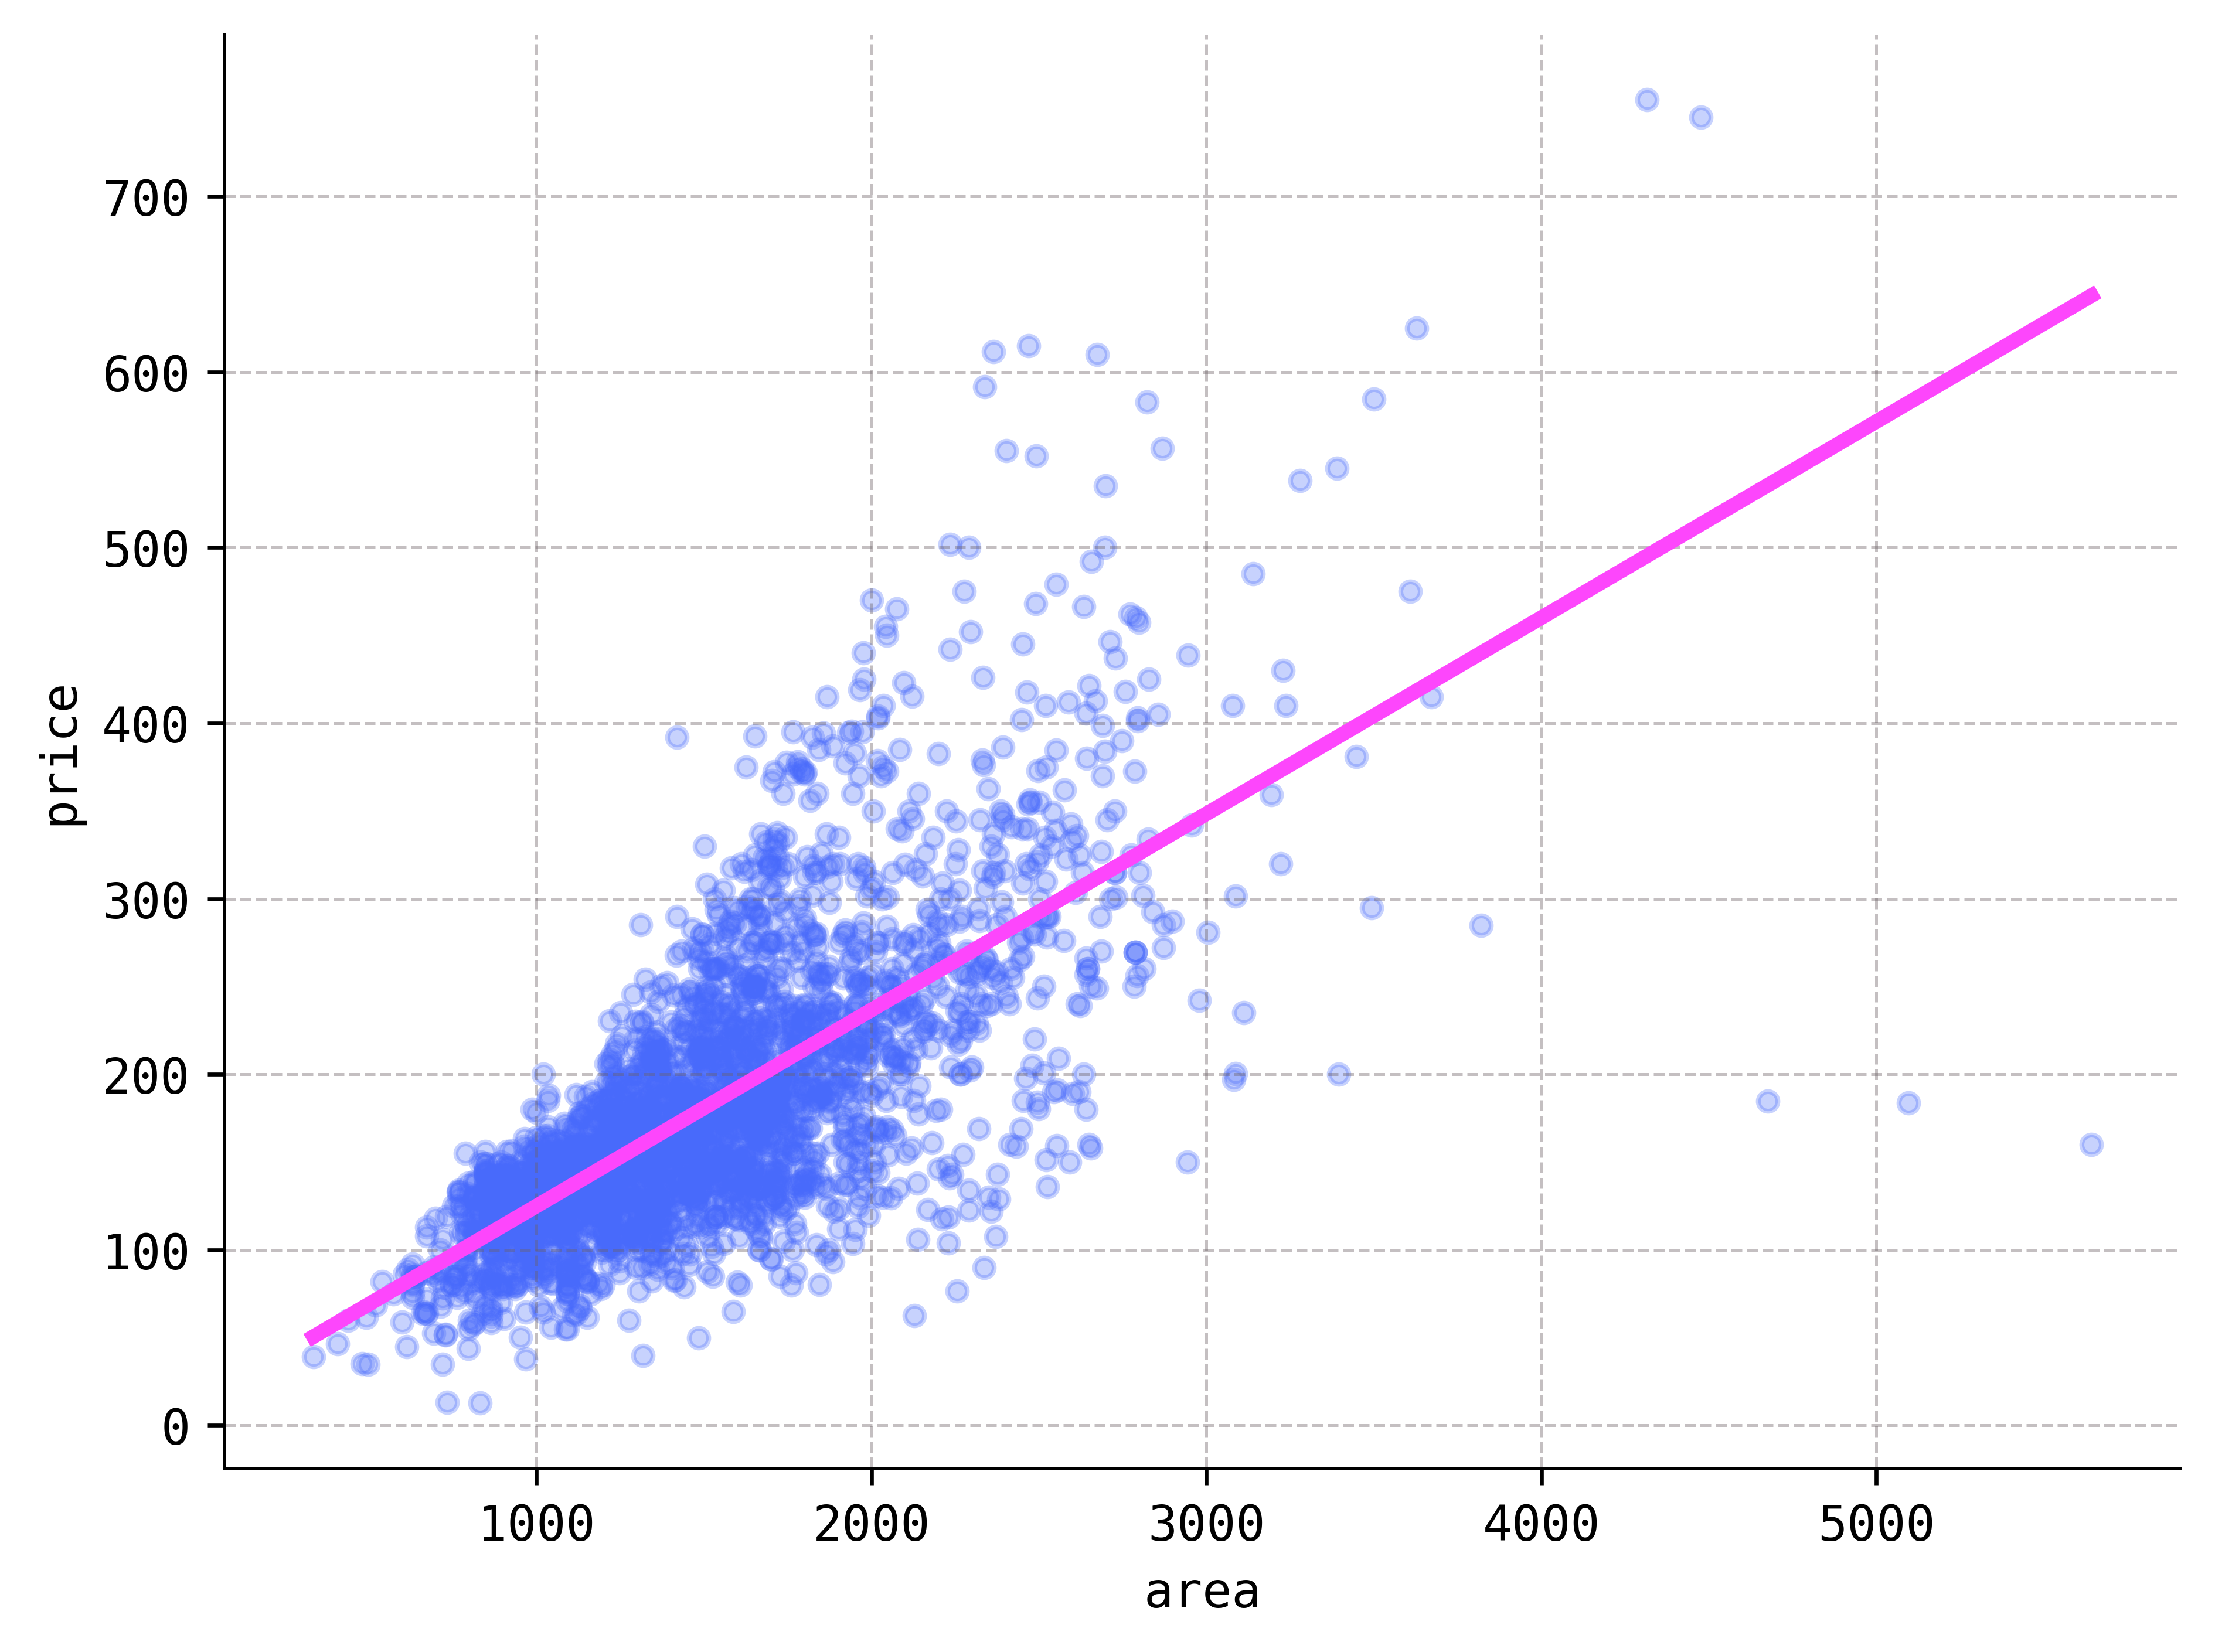

In [4]:
url = 'https://raw.githubusercontent.com/jmyers7/stats-book-materials/main/data/data-3-1.csv'
df = pd.read_csv(url, usecols=['area', 'price'])

sns.regplot(data=df, x='area', y='price', ci=None, scatter_kws={'alpha' : 0.3}, line_kws={'color' : '#FD46FC'})
plt.xlabel('area')
plt.ylabel('price')
plt.tight_layout()

```{margin}

The line in this plot that the data clusters along is called the _linear-regression line_. We will study these in {numref}`Chapters %s <prob-models>` and {numref}`%s <lin-reg>`.
```

There appears to be a "noisy" linear dependence between the size of a house $X$ and its selling price $Y$. Moreover, the line that the data naturally clusters along has positive slope, which indicates that as the size of a house increases, its selling price tends to increase as well.

Our goal in this chapter is to uncover ways to _quantify_ or _measure_ the strength of "noisy" linear dependencies between random variables. We will discover that there are two such measures: _Covariance_ and _correlation_.














## Covariance

The definition of _covariance_ is based on the following pair of basic observations:

> 1. If the observed values of two random variables $X$ and $Y$ cluster along a line of _positive_ slope, then $x$ and $y$ in a data point $(x,y)$ tend to be large (and small) at the same time.
> 2. If the observed values of two random variables $X$ and $Y$ cluster along a line of _negative_ slope, then a large value $x$ tends to be paired with a small value $y$ in a data point $(x,y)$, while a small value of $x$ tends to be paired with a large value $y$.

In order to make something useful from these observations, it is convenient to "center" the dataset by subtracting off the means:

$$
X \xrightarrow{\text{replace with}} X - \mu_X \quad \text{and} \quad Y \xrightarrow{\text{replace with}} Y - \mu_Y.
$$

Notice that

$$
E(X - \mu_X) = E(X) - E(\mu_X) = 0,
$$

and similarly $E(Y-\mu_Y) = 0$, so that when we carry out these replacements, we get random variables with mean $0$. If we center the housing data by subtracting the means and then plot, we get this:

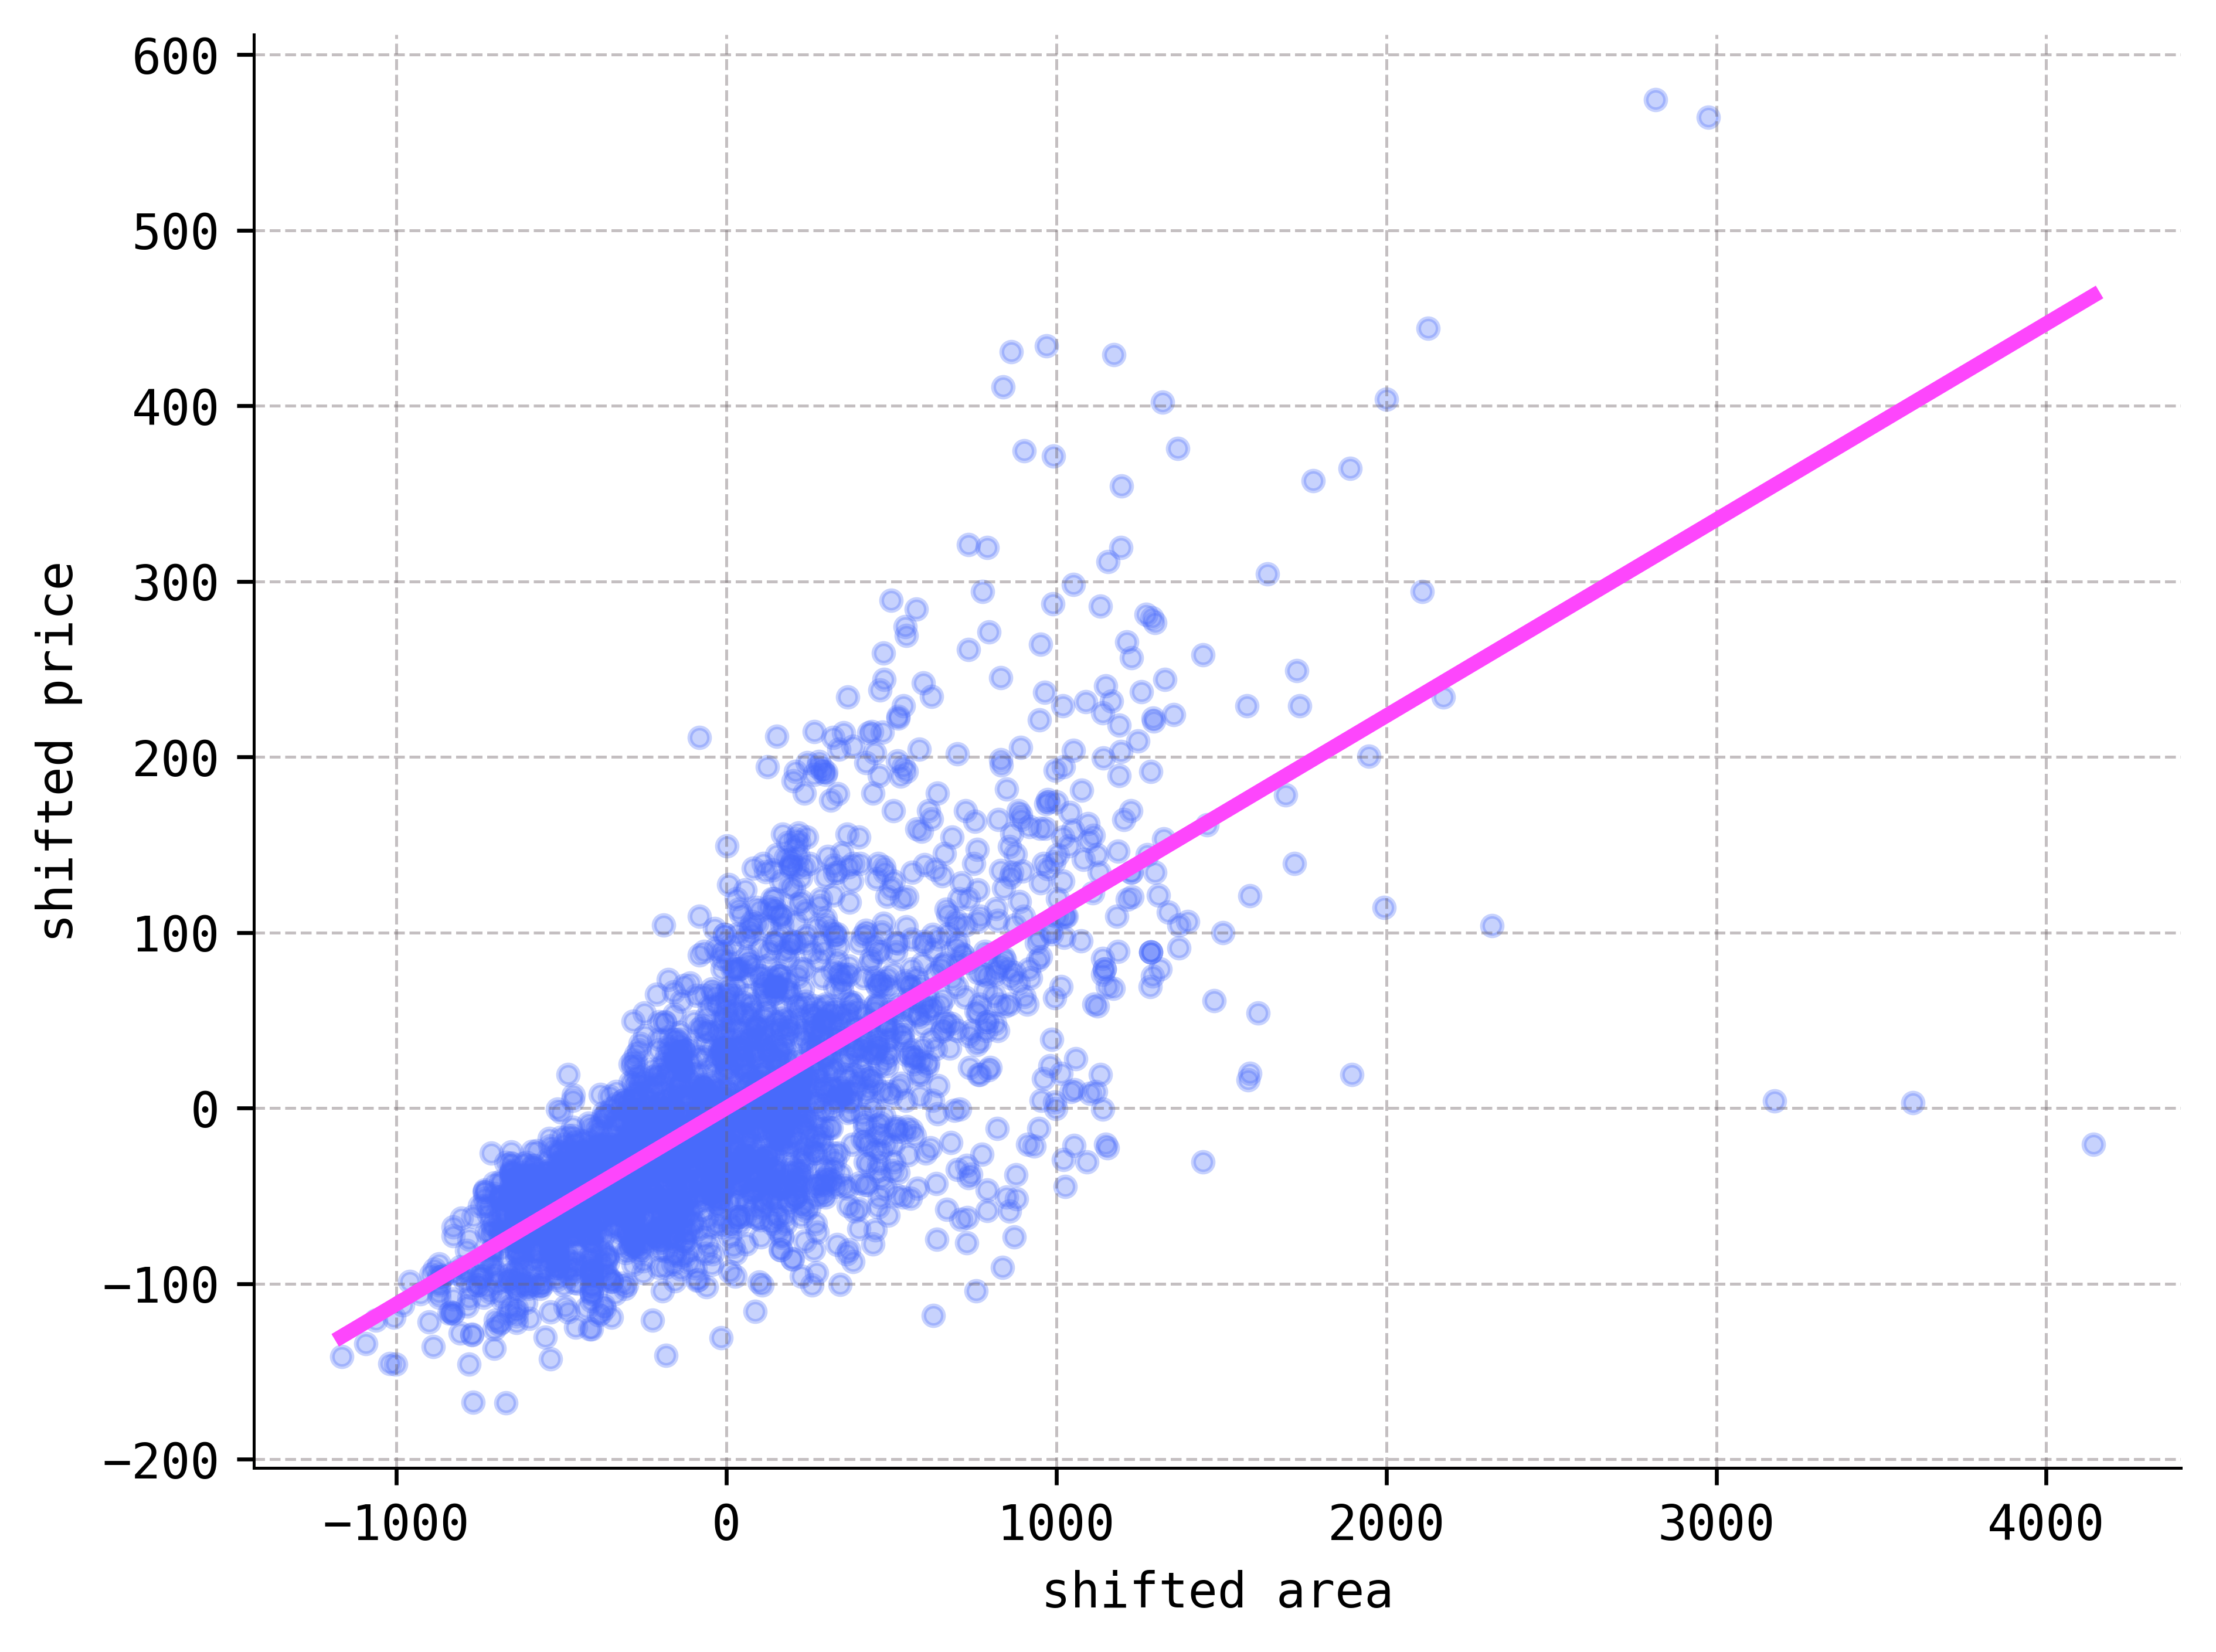

In [5]:
sns.regplot(data=df - df.mean(), x='area', y='price', ci=None, scatter_kws={'alpha' : 0.3}, line_kws={'color' : '#FD46FC'})
plt.xlabel('shifted area')
plt.ylabel('shifted price')
plt.tight_layout()

You can see that the dataset has not changed its shape---it has only shifted so that its "center" is at the origin $(0,0)$.

The reason that we "center" the data is because it allows us to conveniently rephrase our observations above in terms of signs:

> 1. If the observed values of two **centered** random variables $X$ and $Y$ cluster along a line of _positive_ slope, then $x$ and $y$ in a data point $(x,y)$ tend to have the same sign, i.e., $xy>0$.
> 2. If the observed values of two **centered** random variables $X$ and $Y$ cluster along a line of _negative_ slope, then $x$ and $y$ in a data point $(x,y)$ tend to have opposite signs, i.e., $xy < 0$.

Essentially, the next definition takes the average value of the product $xy$, as $(x,y)$ ranges over observed pairs of values of a pair $(X,Y)$ of **centered** random variables. If this average value is positive, it suggests a (noisy) linear dependence with positive slope; if it is negative, it suggests a (noisy) linear dependence with negative slope. A larger average (in either direction---positive or negative) tends to indicate a *stronger* dependency. If the random variables are not centered, then we subtract off their means before computing the product and taking its average value.

```{prf:definition}

Let $X$ and $Y$ be two random variables with expectations $\mu_X = E(X)$ and $\mu_Y = E(Y)$. The _covariance_ of $X$ and $Y$, denoted $\operatorname{Cov}(X,Y)$, is defined via the equation

$$
\operatorname{Cov}(X,Y) = E \left[ (X-\mu_X)(Y-\mu_Y) \right].
$$
```

Before we look at examples, it will be convenient to state and prove the following:

```{prf:theorem} Shortcut Formula for Covariance

Let $X$ and $Y$ be two random variables. Then

$$
\operatorname{Cov}(X,Y) = E(XY) - E(X) E(Y).
$$
```

The proof is a triviality, given all the properties that we already know about expectations:

\begin{align*}
\operatorname{Cov}(X,Y) &= E\left(XY - \mu_Y X - \mu_X Y + \mu_X \mu_Y \right) \\
&= E(XY) - 2\mu_X\mu_Y + \mu_X\mu_Y \\
&= E(XY) - E(X) E(Y).
\end{align*}

Now, armed with this formula, let's do some problems:

```{admonition} Problem Prompt

Do problems 1 and 2 on the worksheet.
```

After completing these two worksheet problems, it is worth taking a look at simulated random draws from the distributions. The density in problem 1 was

$$
f(x,y) = \begin{cases}
2xy + 0.5 & : 0 \leq x, y \leq 1, \\
0 & : \text{otherwise},
\end{cases}
$$

while the density in problem 2 was

$$
f(x,y) = \begin{cases}
3x & : 0 \leq y\leq x \leq 1, \\
0 & : \text{otherwise}.
\end{cases}
$$

If we simulate 8,000 random draws from these densities, center the distributions by subtacting their means, and then generate scatter plots, we get:

In [6]:
# For problem 1, define the conditional distribution by subclassing
# `rv_continuous` from SciPy. The conditional density is
# symmetric in x and y, so we only need one implementation
# using "generic" variables `u` and `v`.
def conditional_density(u, v):
    return (2 * u * v + 1 / 2) / (v + 1 / 2)
class ConditionalRV(rv_continuous):
    def __init__(self, v, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.v = v
    def _pdf(self, u):
        return conditional_density(u, self.v)

# For problem 2, the conditional densities are *not*
# symmetric in `x` and `y`, so we need to define two
# conditional distributions.
def conditional_density_YX(y, x):
    return 1 / x
def conditional_density_XY(x, y):
    return (2 * x) / (1 - y**2)
class ConditionalRV_XY(rv_continuous):
    def __init__(self, y, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.y = y
    def _pdf(self, x):
        return conditional_density_XY(x, self.y)
class ConditionalRV_YX(rv_continuous):
    def __init__(self, x, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.x = x
    def _pdf(self, y):
        return conditional_density_YX(y, self.x)

y_list_prob1 = [0.5]
x_list_prob1 = []
y_list_prob2 = [0.5]
x_list_prob2 = []
n = 10000

# Gibbs sampling loop.
np.random.seed(42)
for i in range(n):
    current_y = y_list_prob1[i]
    conditional_rv = ConditionalRV(a=0, b=1, v=current_y)
    sampled_x = conditional_rv.rvs()
    conditional_rv = ConditionalRV(a=0, b=1, v=sampled_x)
    sampled_y = conditional_rv.rvs()
    y_list_prob1.append(sampled_y)
    x_list_prob1.append(sampled_x)

    current_y = y_list_prob2[i]
    conditional_rv_XY = ConditionalRV_XY(a=current_y, b=1, y=current_y)
    sampled_x = conditional_rv_XY.rvs()
    conditional_rv_YX = ConditionalRV_YX(a=0, b=sampled_x, x=sampled_x)
    sampled_y = conditional_rv_YX.rvs()
    y_list_prob2.append(sampled_y)
    x_list_prob2.append(sampled_x)

# Ditch initial values, discard burn-ins.
_ = y_list_prob1.pop(0)
x_list_prob1 = x_list_prob1[2000:]
y_list_prob1 = y_list_prob1[2000:]
_ = y_list_prob2.pop(0)
x_list_prob2 = x_list_prob2[2000:]
y_list_prob2 = y_list_prob2[2000:]

# Scatter plot for the centered distributions.
_, axes = plt.subplots(ncols=2, figsize=(10, 5))

sns.scatterplot(x=x_list_prob1 - np.mean(x_list_prob1),
                y=y_list_prob1 - np.mean(y_list_prob1),
                alpha=0.5,
                ax=axes[0])
sns.scatterplot(x=x_list_prob2 - np.mean(x_list_prob2),
                y=y_list_prob2 - np.mean(y_list_prob2),
                alpha=0.5,
                ax=axes[1])
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].set_xlim(-0.7, 0.7)
axes[0].set_ylim(-0.7, 0.7)
axes[0].axhline(0, color='black', linewidth=0.5)
axes[0].axvline(0, color='black', linewidth=0.5)
axes[0].set_title('simulated distribution for problem 1')
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
axes[1].set_xlim(-0.7, 0.7)
axes[1].set_ylim(-0.7, 0.7)
axes[1].axhline(0, color='black', linewidth=0.5)
axes[1].axvline(0, color='black', linewidth=0.5)
axes[1].set_title('simulated distribution for problem 2')
plt.tight_layout()

NameError: name 'rv_continuous' is not defined

Our value for the covariance in problem 1 was approximately $0.007$, while our value for the covariance in problem 2 was $\approx 0.019$. Does it make sense to you that both of these covariances are _positive_, given that you now know (roughly) what the distributions look like? My analysis would go something like this:

* In both problems, there _appears_ to be (ever so slightly) more datapoints in the first and third quadrants in the scatter plots where the products

  $$
  (x-\mu_X) (x-\mu_Y)
  $$

  are positive, compared to the second and fourth quadrants where these products are negative. Thus, the fact that the covariances are positive makes sense.

These datasets definitely do not appear to be clustered along a line, which is what many of us might picture in our minds when we think of two random variables with positive covariance. This might have more to do with the strangely shaped supports of the densities; a square in the first case, a triangle in the second. In any case, these examples at least tell us that we need to take care when "interpreting" the covariance, since sometimes the shapes traced out by variables with non-zero covariance do not quite match our intuitions.

A few very useful properties of covariance are listed in the following:

```{prf:theorem} Properties of Covariance

Let $X$, $Y$, and $Z$ be random variables, and $a$, $b$, and $c$ fixed numbers. Then:

1. _Symmetry_. We have

    $$
    \operatorname{Cov}(X,Y) = \operatorname{Cov}(Y,X).
    $$

2. _Linearity_. We have
    
    $$
    \operatorname{Cov}(aX+bY+c,Z) = a\operatorname{Cov}(X,Z) + b \operatorname{Cov}(Y,Z).
    $$

```

I suggest that you prove these two properties on your own. The symmetry property follows immediately from the definition of covariance, while linearity follows from the definition and linearity of expectations. Together, these two properties also imply that covariances are linear in their second arguments as well as their first, in the sense that

$$
\operatorname{Cov}(Z,aX+bY+c) = a\operatorname{Cov}(Z,X) + b \operatorname{Cov}(Z,Y).
$$

So, covariances are not just linear operations---they are _bilinear_!



While the signs of covariances are significant, their precise numerical values may be less so. One reason for this is that covariances are unbounded, in the sense that they may take any value from $-\infty$ to $+\infty$. They are also senstive to the scales on which the variables are measured. For example, in the housing dataset that we considered in the previous section, suppose that $Z$ represents the size of a house measured in _hundereds_ of square feet; then $X$ and $Z$ are related via the equation $Z = X/100$. But then, as we will show below, we have

$$
\operatorname{Cov}(Z,Y) = \frac{1}{100} \operatorname{Cov}(X,Y),
$$

so the covariance between $X$ and $Y$ is _different_ from the covariance between $Z$ and $Y$. The fact that covariances are unbounded and sensitive to scale means that the precise values of covariances can be hard to interpret.